In [2]:
import numpy as np
import pandas as pd

In [3]:
import astropy.units as u
from astropy.coordinates import SkyCoord

In [4]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (16, 9)
import matplotlib.pyplot as plt

In [5]:
!head Vars.E

#  This is the catalog of ASAS eclipsing binaries
#  ASAS_ID    RA(2000)  DEC(2000) PER[days] T0(2450000+) V[mag] Amp[mag]  Class
000058+0236.7  0.016111  2.611667  0.318088  1868.89  12.94  0.46  EC/DSCT/ESD
000108-3330.1  0.018889  -33.501667  0.46658  1869.27  11.51  0.43  EC
000202-6653.3  0.033889  -66.888333  0.326576  1869.07  12.16  0.60  EC
000309-3456.3  0.052500  -34.938333  0.265418  1868.690  12.40  0.47  EC
000336-1452.4  0.060000  -14.873333  1.05465  1870.47  10.93  0.32  EC
000408+1946.9  0.068889  19.781667  0.345194  2623.85  12.19  0.44  EC/ESD
000424-7437.9  0.073333  -74.631667  0.47113  1868.75  12.42  0.22  EC/ESD
000425-5346.4  0.073611  -53.773333  0.288260  1869.737  13.82  0.97  EC


In [6]:
hdr = ["ASAS_ID", "RA", "DEC", "PER", "T0", "V", "Amp", "Class"]

In [7]:
var = pd.read_table("Vars.E", sep="\s+", skiprows=2, names=hdr)

In [8]:
coor = SkyCoord(var["RA"], var["DEC"], unit=(u.hourangle, u.degree))

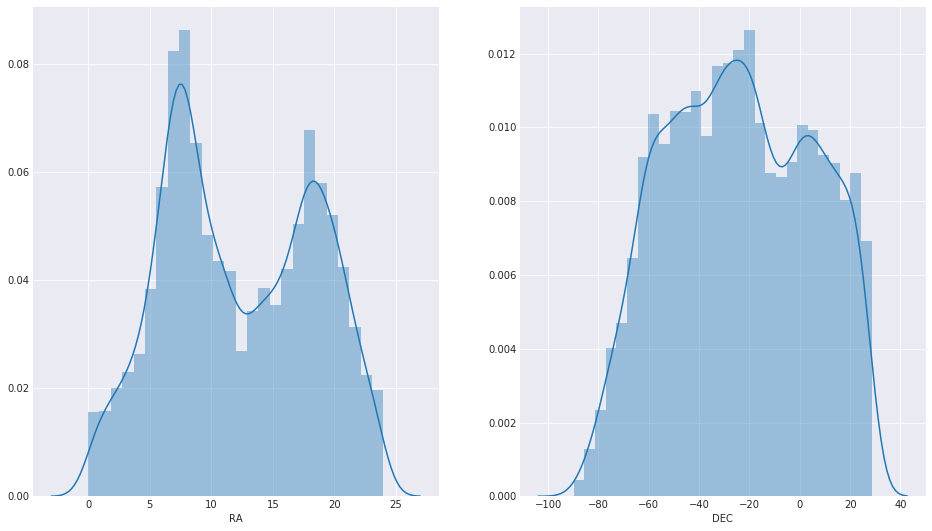

In [9]:
plt.subplot(121); sns.distplot(var["RA"]);
plt.subplot(122); sns.distplot(var["DEC"]);

/usr/lib/python3.6/site-packages/matplotlib/projections/geo.py:493: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


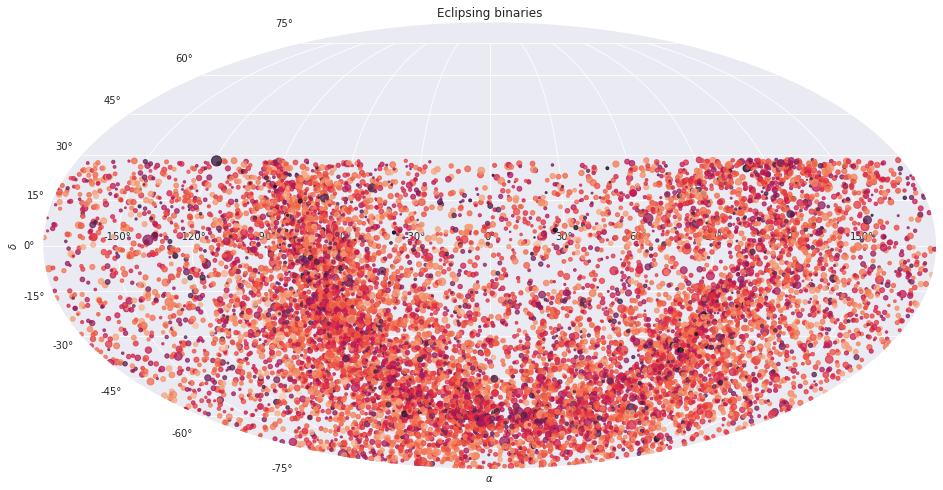

In [14]:
plt.subplot(projection="mollweide")
plt.title("Eclipsing binaries")
plt.xlabel("$\\alpha$")
plt.ylabel("$\\delta$")
plt.scatter(coor.ra.rad-np.pi, coor.dec.rad,
            s=42*var["Amp"], c=var["V"], alpha=0.75);

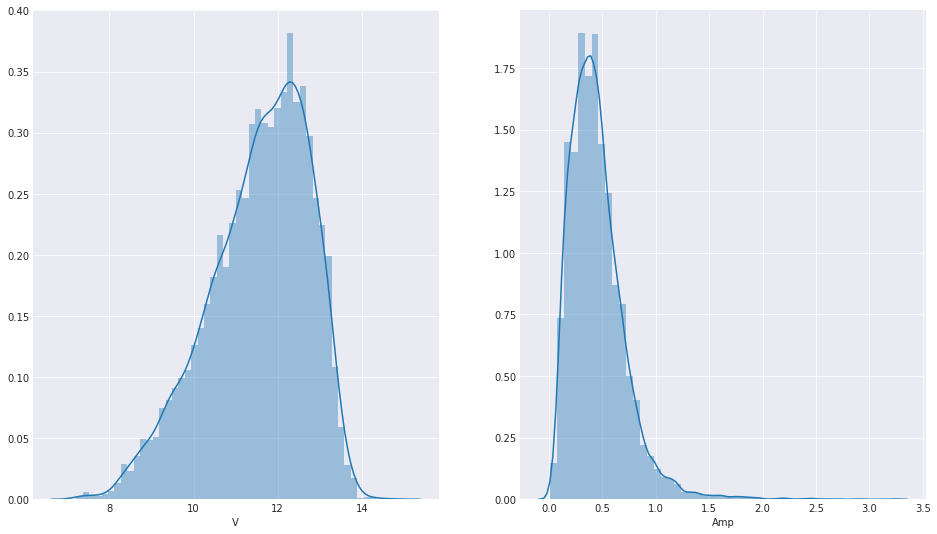

In [15]:
plt.subplot(121); sns.distplot(var["V"]);
plt.subplot(122); sns.distplot(var["Amp"]);

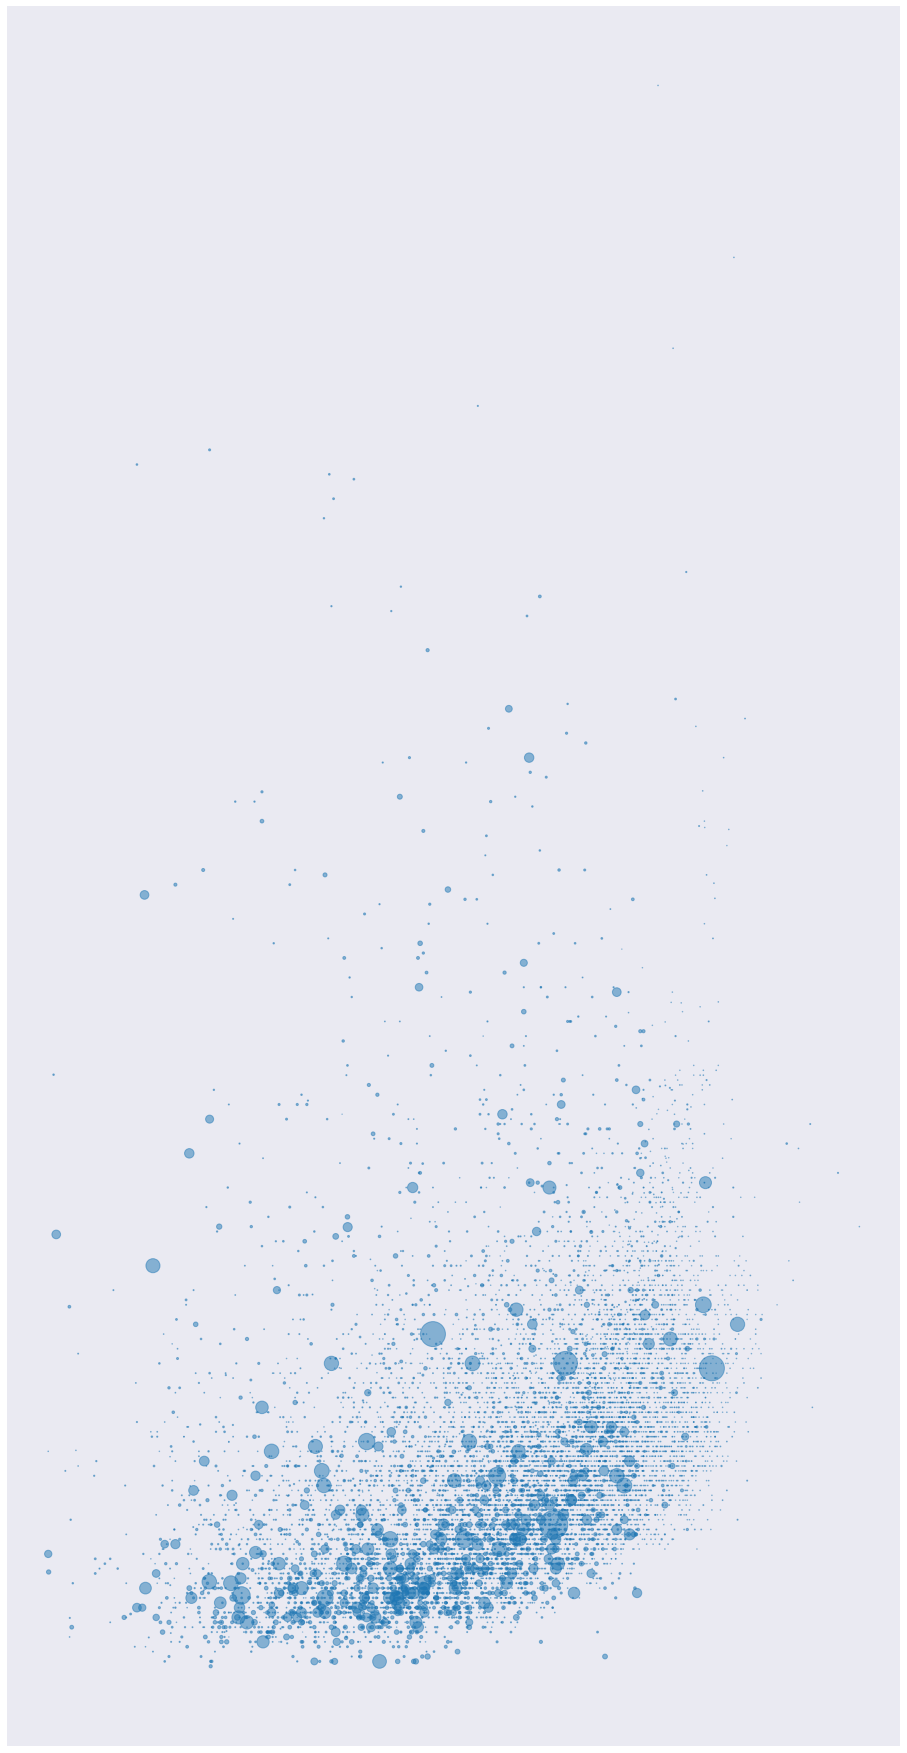

In [16]:
plt.figure(figsize=(16, 32))
#plt.xlabel("V [mag]")
#plt.ylabel("Amplitude")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.scatter(var["V"], var["Amp"], s=var["PER"], alpha=0.5);